In [1]:
import numpy as np
import numpy.random as rnd
rnd.seed()

## Different plotting libraries
In this notebook, we'll look through several different python plotting libraries. In particular, we'll look at:
- matplotlib | <https://matplotlib.org>
- seaborn | <https://seaborn.pydata.org>
- bokeh | <https://bokeh.org>
- plotly | <https://plotly.com/python/>

Where the later, holoviews, is not a library which does the plotting itself, but provides a very high level, but sometimes convienent, interface to multiple libraries.

To get started make sure you download the above packages. Preferably, this can be done in anaconda. If you wish, you can create a new environment called, which will be detailed here:

```bash
conda create -n scivis python=3.9
conda activate scivis
conda install numpy pandas matplotlib seaborn bokeh
conda install -c plotly plotly=5.7.0
conda install -c conda-forge cmocean
conda install "jupyterlab>=3" "ipywidgets>=7.6"
conda install -c conda-forge -c plotly jupyter-dash

```
then, launch your JupyterLab with
```bash
jupyter-lab
```

Let's first remake the data from the scatter plots notebook.

In [2]:
Nsets = 12
Nsmallest = 5
Nbiggest = 100
min_bounds = rnd.uniform(0, 2, Nsets)
max_bounds = rnd.uniform(2, 6, Nsets)
ndat_sets  = rnd.randint(Nsmallest, Nbiggest, Nsets)
sigma = rnd.uniform(0.3, 0.9, Nsets)
offsets = rnd.uniform(0.1, 0.3, Nsets)

deviat = [rnd.normal(0, sigma[i], ndat_sets[i]) for i in range(Nsets)]
x = [rnd.uniform(min_bounds[i], max_bounds[i], ndat_sets[i]) for i in range(Nsets)]
y = [2.2*x[i] + 1.1 + deviat[i] + offsets[i] for i in range(Nsets)]
ID = [(i+1)*np.ones(ndat_sets[i]) for i in range(Nsets)]
labels = ["Data %d"%(i+1) for i in range(Nsets)]

In [3]:
x1D = np.hstack(np.array(x, dtype=object))
y1D = np.hstack(np.array(y, dtype=object))
ID1D = np.hstack(np.array(ID, dtype=object))
datMat = {'x':x1D, 'y':y1D, 'SrcID':ID1D.astype(int).astype(str)}

Most of these libraries directly work (or work best with) pandas dataframes. If you're not familar with these, you can look them up here: <https://pandas.pydata.org>. Pandas dataframes are becoming more common and enable a lot of reduction and cleaning methods, searching functions, etc.

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(datMat, columns=["x", "y", "SrcID"])

In [6]:
df.head()

,x,y,SrcID
0,3.891363,10.816092,1
1,4.262151,11.062942,1
2,1.631090,4.232717,1
3,1.984949,5.265821,1
4,2.952389,7.245629,1


### Matplotlib
This is the library most are familiar with. It's fairly low level, and enables a lot of control. However, it also means that making good looking, but complex, plots can sometimes take a lot of effort. But, it is widely used - so the saving grace is that MOST problems can be found on stackoverflow

In [7]:
import matplotlib.pyplot as plt

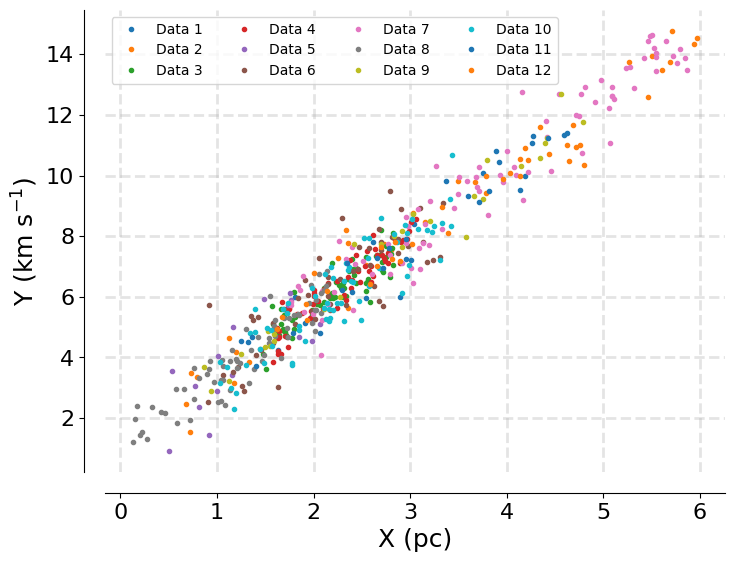

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#Plot the data
for i in range(Nsets):
    ax.plot(x[i], y[i], '.', label=labels[i])

#Get styling!
ax.set_xlabel("X (pc)", fontsize=18)
ax.set_ylabel("Y (km s$^{-1}$)", fontsize=18)
ax.grid(which='major', linestyle='--', alpha=0.333, lw=2.0)
ax.tick_params(which='major', axis='both', labelsize=16)

#Maybe fiddle with the spines a bit...
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position(('outward', 15))

plt.legend(ncol=4)
plt.show()

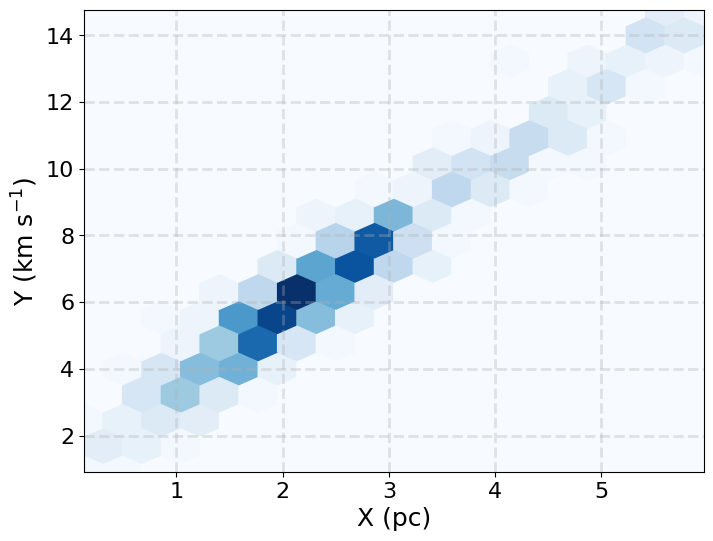

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#Plot the data
ax.hexbin(x1D, y1D, cmap=plt.cm.Blues, gridsize=16)

#Get styling!
ax.set_xlabel("X (pc)", fontsize=18)
ax.set_ylabel("Y (km s$^{-1}$)", fontsize=18)
ax.grid(which='major', linestyle='--', alpha=0.333, lw=2.0)
ax.tick_params(which='major', axis='both', labelsize=16)

ax.set_xlim(min(x1D), max(x1D))
ax.set_ylim(min(y1D), max(y1D))

plt.show()

### Seaborn
This library sits atop matplotlib. It interfaces well with pandas and can allow for very easy explorations of data sets. Because it sits on top of matplotlib, you can still do a lot of fiddling with plots. Since Seaborn is basically a high-level interface to matplotlib, you can do a lot of the same customization, while starting from something closer to what you may want!

In [10]:
import seaborn as sns

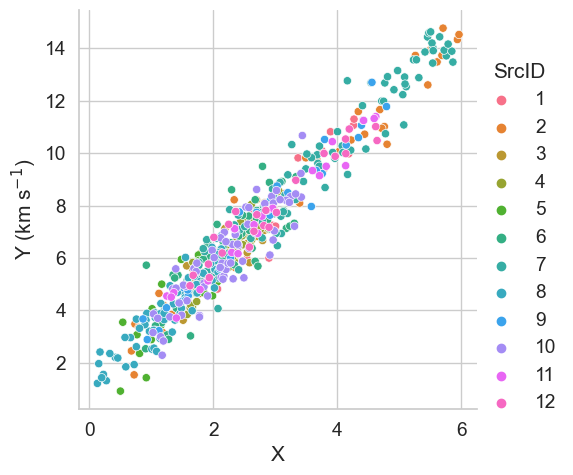

In [11]:
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
p = sns.relplot(x="x", y="y", hue="SrcID", data=df)
p.set_axis_labels("X", "Y (km s$^{-1}$)")

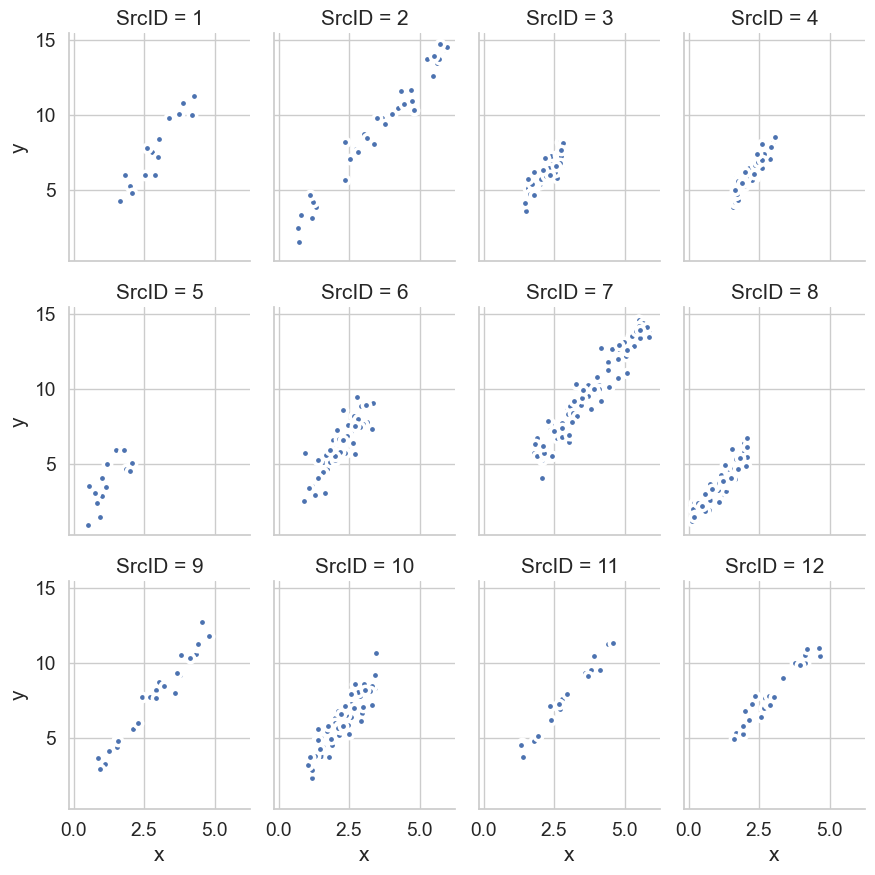

In [12]:
p = sns.relplot(x="x", y="y",
            col="SrcID", col_wrap=4, 
            height=3, aspect=.75, linewidth=2.5, data=df);

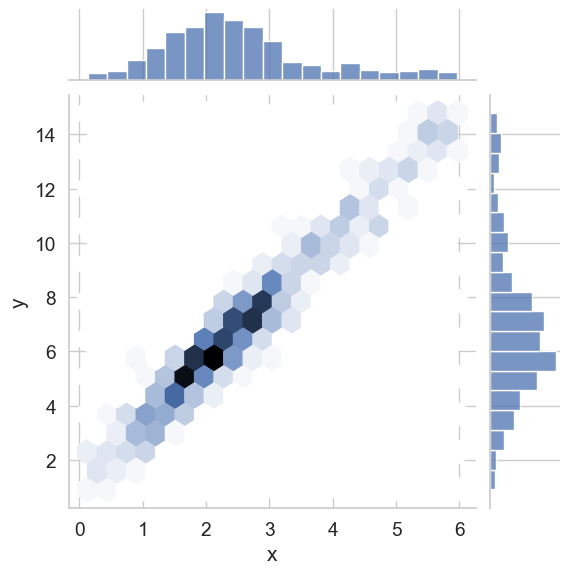

In [13]:
sns.jointplot(data=df, x="x", y="y", kind='hex')

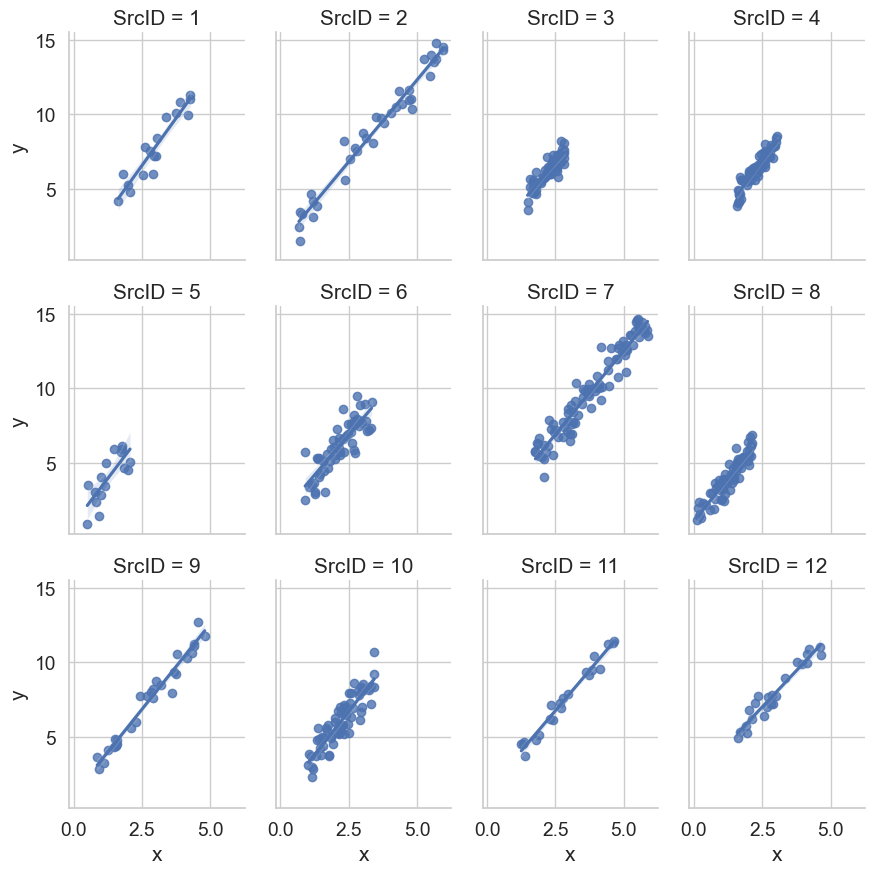

In [14]:
sns.lmplot(x="x", y="y", data=df, col='SrcID', col_wrap=4, 
            height=3, aspect=.75)

### Bokeh
This is a separate library and again interfaces well with pandas. It is very useful for making interactive plots. It is very high level, so it can be a bit difficult to fiddle too much with plots.

In [15]:
import bokeh as bh
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.transform import linear_cmap, factor_cmap
from bokeh.util.hex import hexbin

output_notebook()

Loading BokehJS ...

In [16]:
source = ColumnDataSource(df)

TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("SrcID", "@SrcID"),
]

In [17]:
p = figure(title="Random Data", x_axis_label='x', y_axis_label='y (km/s)',
          tools="pan,lasso_select,box_select,crosshair", tooltips=TOOLTIPS)
# chage plot size
p.width = 450
p.height = 450

p.circle("x", "y", source=source, legend_field="SrcID", 
        color=factor_cmap('SrcID', 'Category20_12', np.arange(1,Nsets+1,1).astype(str)))

GlyphRenderer(id='1041', ...)

In [18]:
show(p)

In [19]:
p2 = figure(title="Random Data", x_axis_label='x', y_axis_label='y (km/s)',
          tools="pan,lasso_select,box_select,crosshair", tooltips=TOOLTIPS,
           match_aspect=True, background_fill_color='#440154', x_range=(0,6))
bins = hexbin(x1D, y1D, 0.1)
p2.hex_tile(q="q", r="r", size=0.1, line_color=None, source=bins,
           fill_color=linear_cmap('counts', 'Viridis256', 0, max(bins.counts)))
show(p2)

### Plotly
This is becoming a more and more popular package. It has MANY different built in plots, almost any you could possibly want or think of. You can also add interactivity, and export in different forms. It is built on top of javascript, and so directly integrates also into JupyterLab.

Here, we will focus on plotly express. However, you can use full plotly as well and experiment with it!

In [20]:
import plotly.express as px

In [21]:
fig = px.scatter(df, x="x", y="y", color="SrcID", facet_col="SrcID", trendline="ols",
                facet_col_wrap=4, width=800, height=800)
fig.show()

In [22]:
fig = px.scatter(df, x="x", y="y", marginal_x="histogram", marginal_y="histogram",
                trendline="ols", height=800, width=800,
                labels={
                     "x": "x",
                     "y": "y (km/s)",
                     "SrcID": "Source ID"
                 }, template="simple_white")
fig.show()

In [23]:
fig.write_html("plotlyScatter.html")